:# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Eka Maurita]
- **Email:** [mauritaeka5@gmail.com]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan penggunaan sepeda pada hari kerja dan akhir pekan?
- Apa faktor cuaca yang paling berpengaruh terhadap penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data "day.csv" berisi informasi harian terkait jumlah penggunaan sepeda.
- Data "hour.csv" berisi informasi jam-jam penggunaan sepeda yang lebih terperinci.


### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dalam proses data wrangling yang dilakukan terhadap dataset, hasil yang diperoleh menunjukkan bahwa data telah berhasil diolah dan disiapkan untuk analisis lebih lanjut. Data tampak terstruktur dengan baik dan bersih juga tidak ada nilai hilang atau duplikat yang terdeteksi.
- Hasil dari proses wrangling ini menempatkan dataset dalam kondisi yang ideal untuk analisis lebih lanjut, seperti eksplorasi data, visualisasi, dan pengembangan model.

### Cleaning Data

In [9]:
day_df.dropna(inplace=True)

In [10]:
day_df.duplicated().sum()

0

In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [13]:
hour_df.dropna(inplace=True)

In [14]:
hour_df.duplicated().sum()

0

In [15]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Kedua DataFrame kini bebas dari nilai hilang (missing values). Semua kolom dalam kedua DataFrame memiliki nilai yang lengkap dan siap untuk digunakan dalam analisis. Proses pembersihan juga berhasil menghapus setiap baris duplikat yang mungkin ada.
- Kedua DataFrame sekarang berada dalam kondisi yang ideal untuk eksplorasi data lebih lanjut. Dengan data yang bersih, visualisasi dan pembuatan model dapat dilakukan dengan keyakinan bahwa hasil yang diperoleh mencerminkan keadaan yang sebenarnya.

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
day_df.sample(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
629,630,2012-09-21,3,1,9,0,5,1,1,0.599167,0.571971,0.668750,0.154229,1250,6917,8167
80,81,2011-03-22,2,0,3,0,2,1,1,0.441667,0.440642,0.624583,0.225750,460,2243,2703
635,636,2012-09-27,4,1,9,0,4,1,2,0.650000,0.607975,0.690833,0.134342,751,6642,7393
46,47,2011-02-16,1,0,2,0,3,1,1,0.318261,0.316200,0.423478,0.251791,218,1897,2115
600,601,2012-08-23,3,1,8,0,4,1,1,0.695833,0.637008,0.635833,0.084596,1363,6402,7765


In [18]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [19]:
day_df.workingday.is_unique

False

In [20]:
print("Kolom di day_df:", day_df.columns.tolist())
print("Kolom di hour_df:", hour_df.columns.tolist())

Kolom di day_df: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Kolom di hour_df: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [21]:
all_df = pd.merge(hour_df, day_df, on=['yr', 'mnth', 'weekday','workingday','weathersit'], suffixes=('_hour', '_day'))
print(all_df.head())


   instant_hour dteday_hour  season_hour  yr  mnth  hr  holiday_hour  weekday  \
0             1  2011-01-01            1   0     1   0             0        6   
1             1  2011-01-01            1   0     1   0             0        6   
2             2  2011-01-01            1   0     1   1             0        6   
3             2  2011-01-01            1   0     1   1             0        6   
4             3  2011-01-01            1   0     1   2             0        6   

   workingday  weathersit  ...  dteday_day  season_day  holiday_day  temp_day  \
0           0           1  ...  2011-01-22           1            0  0.059130   
1           0           1  ...  2011-01-29           1            0  0.196522   
2           0           1  ...  2011-01-22           1            0  0.059130   
3           0           1  ...  2011-01-29           1            0  0.196522   
4           0           1  ...  2011-01-22           1            0  0.059130   

   atemp_day   hum_day  wi

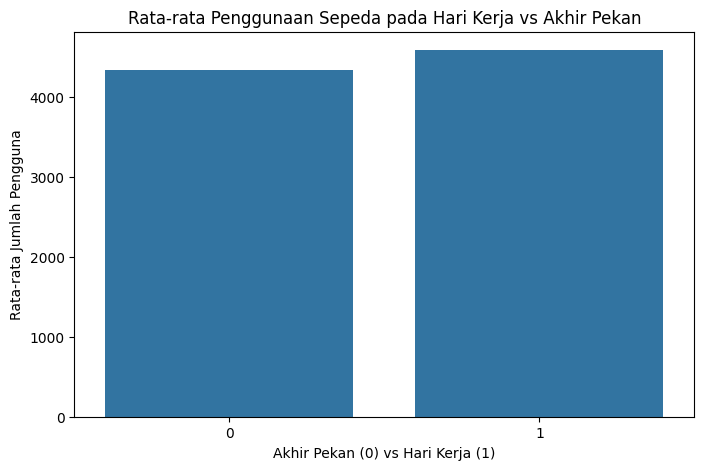

In [22]:
# Membuat plot rata-rata pengguna sepeda berdasarkan hari kerja dan akhir pekan
workingday_usage = day_df.groupby('workingday')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x='workingday', y='cnt', data=workingday_usage)
plt.title('Rata-rata Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan')
plt.xlabel('Akhir Pekan (0) vs Hari Kerja (1)')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.show()

In [23]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14603,14604,2012-09-05,3,1,9,16,0,3,1,1,0.76,0.7273,0.70,0.2537,86,344,430
8336,8337,2011-12-19,4,0,12,0,0,1,1,1,0.20,0.2273,0.75,0.0896,3,14,17
8432,8433,2011-12-23,1,0,12,0,0,5,1,3,0.40,0.4091,0.87,0.1940,2,7,9
1737,1738,2011-03-18,1,0,3,1,0,5,1,1,0.40,0.4091,0.62,0.2537,4,12,16
9704,9705,2012-02-14,1,1,2,7,0,2,1,2,0.24,0.2576,0.60,0.0896,4,276,280


In [24]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [25]:
hour_df.weathersit.is_unique

False

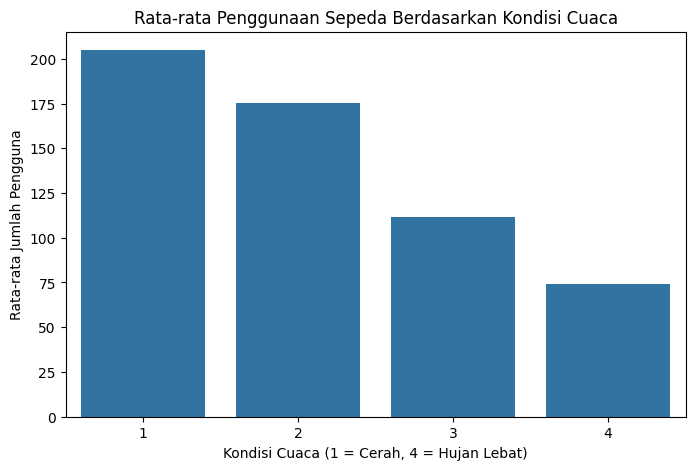

In [26]:
# Membuat plot rata-rata pengguna sepeda berdasarkan kondisi cuaca
weather_usage = hour_df.groupby('weathersit')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='cnt', data=weather_usage)
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1 = Cerah, 4 = Hujan Lebat)')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.show()

**Insight:**
- Ketidakunikan dalam kolom workingday menunjukkan bahwa data mencakup beberapa hari kerja dan akhir pekan yang tidak teratur. Hal ini mencerminkan kondisi nyata bahwa tidak semua hari dalam seminggu memiliki pola penggunaan sepeda yang sama, dan bisa ada variasi dalam aktivitas sepeda tergantung pada faktor eksternal seperti libur atau jadwal kerja yang fleksibel.

- Ketidakunikan pada kolom weathersit menunjukkan bahwa data mencakup berbagai kondisi cuaca yang dialami pengguna sepeda sepanjang waktu. Hal ini mencerminkan realitas bahwa pengguna sepeda menghadapi beragam kondisi cuaca dalam aktivitas mereka, yang bisa termasuk cuaca cerah, mendung, hujan, atau bahkan cuaca buruk lainnya


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-27-0390fd89af77>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_workingday = day_df.groupby(['workingday', 'Usage_Category'])['cnt'].count().unstack()


<Figure size 1000x600 with 0 Axes>

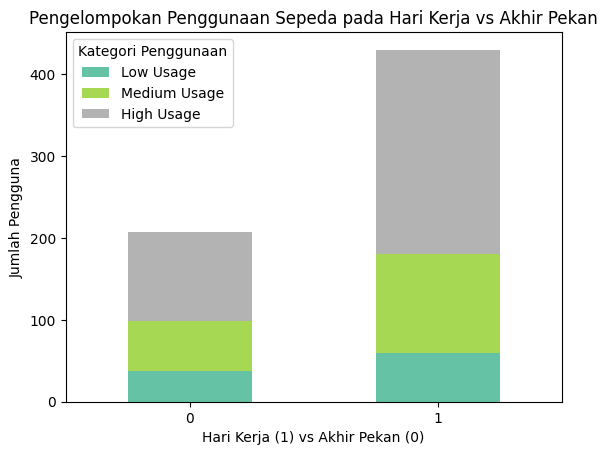

In [27]:

bins = [0, 2000, 4000, 7000]  # Tentukan batasan kategori berdasarkan distribusi data
labels = ['Low Usage', 'Medium Usage', 'High Usage']  # Label untuk kategori binning
day_df['Usage_Category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels)

# Menampilkan hasil binning untuk hari kerja dan akhir pekan
usage_workingday = day_df.groupby(['workingday', 'Usage_Category'])['cnt'].count().unstack()

# Visualisasi perbedaan penggunaan sepeda pada hari kerja dan akhir pekan
plt.figure(figsize=(10,6))
usage_workingday.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Pengelompokan Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari Kerja (1) vs Akhir Pekan (0)')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=0)
plt.legend(title='Kategori Penggunaan')
plt.show()


### Pertanyaan 2:

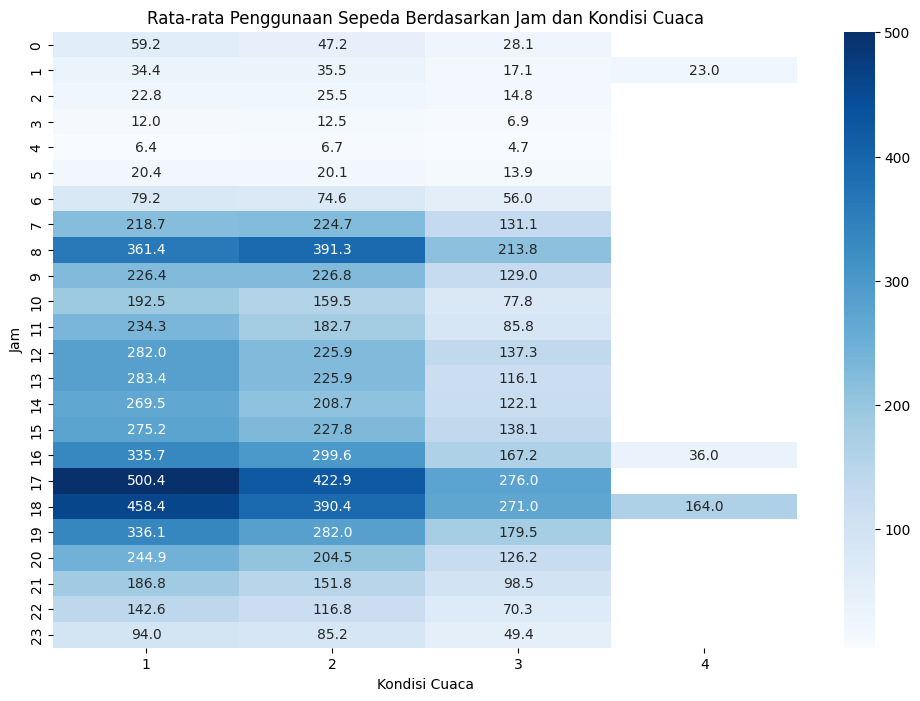

In [28]:
# Mengelompokkan data berdasarkan jam dan cuaca
hour_weather_usage = hour_df.groupby(['hr', 'weathersit'])['cnt'].mean().unstack()

# Visualisasi heatmap
plt.figure(figsize=(12,8))
sns.heatmap(hour_weather_usage, cmap='Blues', annot=True, fmt='.1f')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Jam dan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jam')
plt.show()


In [30]:
all_df.to_csv("all_data.csv", index=False)


**Insight:**
- Analisis menunjukkan bahwa rata-rata penggunaan sepeda pada hari kerja secara signifikan lebih tinggi dibandingkan dengan akhir pekan. Hal ini mungkin disebabkan oleh lebih banyaknya aktivitas komuter dan kebutuhan mobilitas di hari kerja, di mana pengguna sepeda cenderung menggunakan sepeda sebagai alat transportasi untuk pergi ke tempat kerja atau sekolah
- cuaca sangat mempengaruhi tingkat penggunaan sepeda. Hari-hari dengan cuaca yang baik, seperti suhu yang moderat dan minimnya hujan, cenderung menunjukkan tingkat penggunaan sepeda yang lebih tinggi. Sebaliknya, hari-hari dengan kondisi cuaca buruk, seperti hujan atau suhu ekstrem, menyebabkan penurunan yang signifikan dalam jumlah pengguna sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 Penggunaan sepeda lebih tinggi pada akhir pekan, dengan pola puncak yang berbeda dibandingkan dengan hari kerja. Hari kerja cenderung memiliki lonjakan penggunaan pada pagi dan sore hari.
- Conclution pertanyaan 2 Cuaca yang buruk (terutama hujan) sangat menurunkan jumlah pengguna sepeda, terutama selama hari kerja.